# Project Three - Frisbee Flight
Adi Sudhakar and George Tighe

In [911]:
from modsim import *
pd.options.display.max_rows = 4000
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [892]:
launch = SweepSeries()
launch = linrange(0, 50, 5)
launch = launch * pi /180
aattack = SweepSeries()
aattack = linrange(-10, 16, 2)
#aattack = 10
print(launch)
print(aattack)

[0.         0.08726646 0.17453293 0.26179939 0.34906585 0.43633231
 0.52359878 0.61086524 0.6981317  0.78539816]
[-10  -8  -6  -4  -2   0   2   4   6   8  10  12  14]


In [893]:
system = System(m = 0.175, d = 0.27, v0 = 15, launch = launch, aattack = aattack, g = -9.8, 
                p_air = 1.23, dt = 0.1)
state = State(xpos = 0, zpos = 1, vx = 14, vz = 0)

In [894]:
def drag(system, state, alpha):
    unpack(system)
    A = 0.057 #m^2. Planform area of the frisbee
    cdi = SweepSeries()
    cdi[-10] = 0.15
    cdi[-3] = 0.08
    cdi[0] = 0.1
    cdi[5] = 0.15
    cdi[10] = 0.26
    cdi[15] = 0.39
    cdi[20] = 0.57
    cdi[25] = 0.75
    cdi[30] = 0.92
    cdf = interpolate(cdi)
    cdrag = cdf(aattack)
    
    cd = 0.08 + ((alpha+4)*pi/180)**2
    
    v = ((state.vx**2)+(state.vz**2))**(1/2)
    fdrag = p_air*A*cd*(state.vx**2)
        
    return fdrag

In [895]:
def lift(system, state, alpha):
    unpack(system)
    A = 0.057 #m^2. Planform area of the frisbee
    cli = SweepSeries()
    cli[-10] = -0.225
    cli[-3] = 0
    cli[0] = 0.150
    cli[5] = 0.450
    cli[10] = 0.725
    cli[15] = 0.975
    cli[20] = 1.2
    cli[25] = 1.45
    cli[30] = 1.675
    clf = interpolate(cli)
    cl = 0.1 + (1.4*alpha*pi/180)
    clift = clf(aattack)
    v = ((state.vx**2)+(state.vz**2))**(1/2)
    flift = (1/2)*p_air*A*cl*(state.vx**2) #Lift force.
    return flift

In [896]:
def updatethefunc(system, state, t, alpha):
    
    unpack(system)
    
    fvert = lift(system, state, alpha) + (m*g)
    
    dvz = fvert*dt / m
    dvx = -drag(system, state, alpha)*dt
    
    vzf = dvz + state.vz
    vxf = dvx + state.vx
    
    xposf = state.xpos + (vxf*dt)
    zposf = state.zpos + (vzf*dt)
    
    newstate = State(xpos = xposf, zpos = zposf, vx = vxf, vz = vzf)
    
    
    return newstate

In [897]:
def runsimulation():
    data = SweepSeries()
    for n in aattack:
        frame = TimeFrame(columns = state.index)
        frame.row[0] = state
        
        ts = linrange(0, 100, system.dt) 
        for t in ts:
                if frame.row[t].zpos > 0:
                    frame.row[t+system.dt] = updatethefunc(system, frame.row[t], t, n)
                else: 
                    break
        data[n] = frame
    return data

In [898]:
results = runsimulation()

In [899]:
print(results[-10])

        xpos       zpos       vx       vz
0.0        0          1       14        0
0.1   1.3875   0.845327   13.875 -1.54673
0.2  2.76272    0.53699  13.7522 -3.08338
0.3  4.12588  0.0759678  13.6316 -4.61022
0.4  5.47719  -0.536783  13.5131 -6.12751


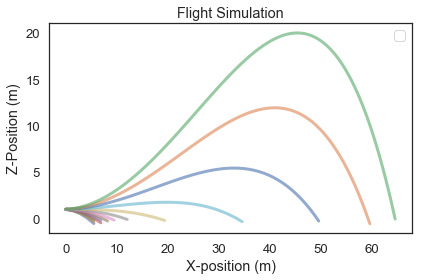

In [900]:
for i in aattack:
    plot(results[i].xpos, results[i].zpos)
    decorate(xlabel = 'X-position (m)', ylabel = 'Z-Position (m)', title = 'Flight Simulation')

In [901]:
def runsimulation2(state):
    data = SweepSeries()
    for n in aattack:
        frame = TimeFrame(columns = state.index)
        frame.row[0] = state
        
        ts = linrange(0, 100, system.dt) 
        for t in ts:
                if frame.row[t].zpos > 0:
                    frame.row[t+system.dt] = updatethefunc(system, frame.row[t], t, n)
                else: 
                    break
        data[n] = frame
    return data

In [902]:
def superrun():
    lsweep = TimeSeries()
    for j in launch:
        state = State(xpos = 0, zpos = 1, vx = system.v0*np.cos(j), vz = system.v0*np.sin(j))
        lsweep[j] = runsimulation2(state)
    return lsweep

In [903]:
supahdupahresults = superrun()

In [904]:
print(supahdupahresults[0],[-10])

-10             xpos      zpos         vx        vz
0...
-8              xpos      zpos         vx        vz
0...
-6              xpos      zpos         vx        vz
0...
-4              xpos      zpos         vx        vz
0...
-2              xpos      zpos         vx        vz
0...
 0              xpos      zpos         vx        vz
0...
 2               xpos      zpos         vx        vz
...
 4               xpos      zpos         vx        vz
...
 6               xpos      zpos         vx        vz
...
 8               xpos      zpos         vx        vz
...
 10              xpos       zpos         vx         v...
 12              xpos       zpos         vx         v...
 14              xpos       zpos         vx         v...
dtype: object [-10]


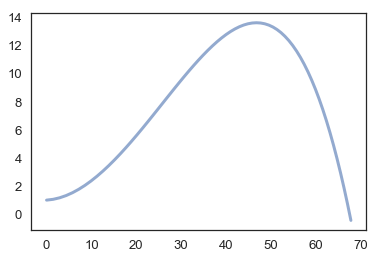

In [910]:
plot(supahdupahresults[0][10].xpos, supahdupahresults[0][10].zpos)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

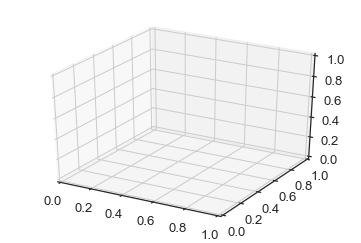

In [915]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = aattack
y = launch
z = supahdupahresults[0][0].xpos


ax.scatter(x, y, z, c='r', marker='*')

ax.set_xlabel('Angle of Attack (Rad.)')
ax.set_ylabel('Launch Angle (Rad.)')
ax.set_zlabel('Distance (m)')

plt.show()